In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargar el dataset
file_path = "../Data/airbnb_nyc_clean.csv"  # Ruta del archivo subido
df = pd.read_csv(file_path)

In [3]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  construction_year               

In [4]:
# Mostrar las primeras filas del dataset
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,13.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.0,124.0,3.0,0.0,2019-06-14,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,blank,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,74.0,13.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [5]:
# Resumen estadístico de las variables numéricas
df.describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,6.930500e+04,6.930500e+04,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000,69305.000000
mean,2.015746e+07,4.929192e+10,40.728070,-73.949036,2012.489503,624.736070,124.894026,4.620330,28.003896,1.301503,3.321636,8.976755,153.184287
std,1.109105e+07,2.854010e+10,0.055973,0.050470,5.756144,331.158937,66.222794,4.356887,52.035180,1.659188,1.255746,34.808447,134.421373
min,1.001254e+06,1.303496e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,0.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.057049e+07,2.459948e+10,40.688540,-73.982790,2008.000000,339.000000,68.000000,2.000000,1.000000,0.300000,2.000000,1.000000,18.000000
50%,2.013964e+07,4.915407e+10,40.722650,-73.954390,2012.000000,624.736070,124.894026,3.000000,7.000000,0.790000,3.000000,1.000000,127.000000
75%,2.970878e+07,7.406137e+10,40.762730,-73.931380,2017.000000,911.000000,182.000000,6.000000,30.000000,1.730000,4.000000,3.000000,281.000000
max,5.736355e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,13.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [6]:
# Identificar valores nulos por columna
df_missing_values = df.isnull().sum()
df_missing_values

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64

In [7]:
# Identificar duplicados
df_duplicated = df.duplicated().sum()
df_duplicated

np.int64(0)

📌 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  const

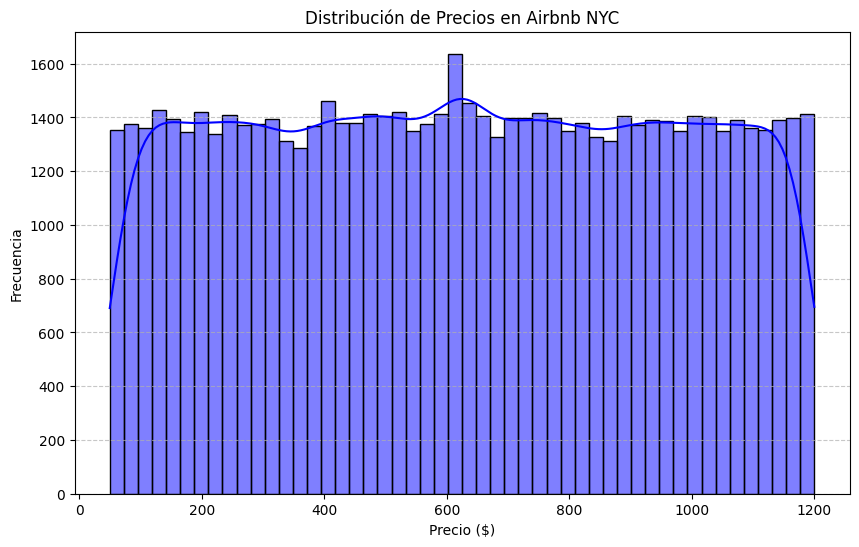

In [8]:



# Mostrar información general del dataset
print("📌 Información del Dataset:")
print(df.info())

# Descripción estadística de las columnas numéricas
print("\n📊 Descripción Estadística (Numéricas):")
print(df.describe())

# Descripción estadística de las columnas categóricas
print("\n📊 Descripción Estadística (Categóricas):")
print(df.describe(include='object'))

# Revisar valores nulos
print("\n🔍 Valores Nulos en el Dataset:")
print(df.isnull().sum())

# Revisar valores duplicados
print("\n📍 Valores Duplicados en el Dataset:")
print(f"Total de filas duplicadas: {df.duplicated().sum()}")

# Visualización de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title("Distribución de Precios en Airbnb NYC")
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1️⃣ Análisis Univariante (Histogramas, Boxplot, Countplot)
Analizamos la distribución de cada variable individualmente.

<Figure size 1200x800 with 0 Axes>

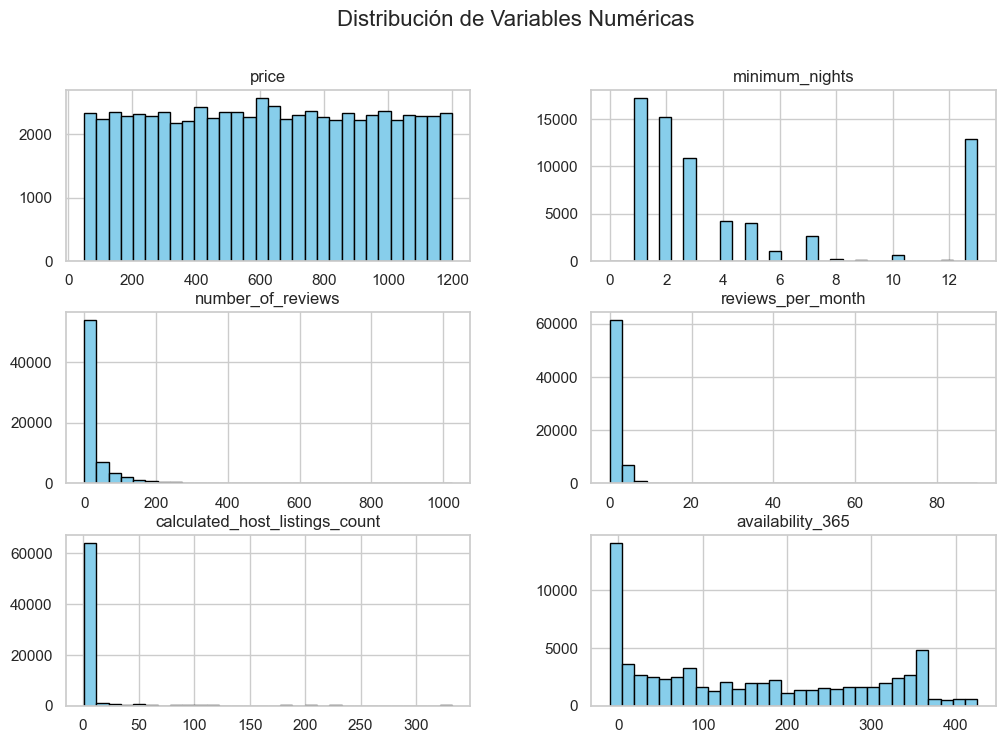

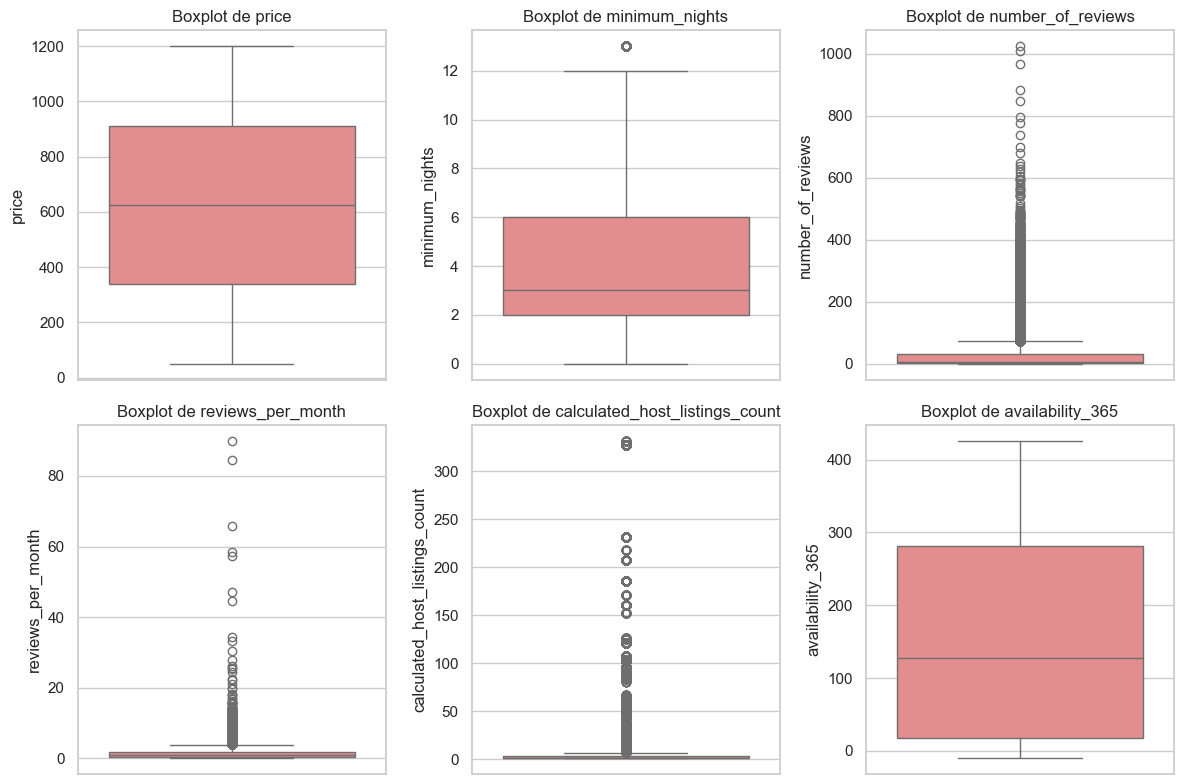

C:\Users\carol\AppData\Local\Temp\ipykernel_6568\3925442821.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
C:\Users\carol\AppData\Local\Temp\ipykernel_6568\3925442821.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


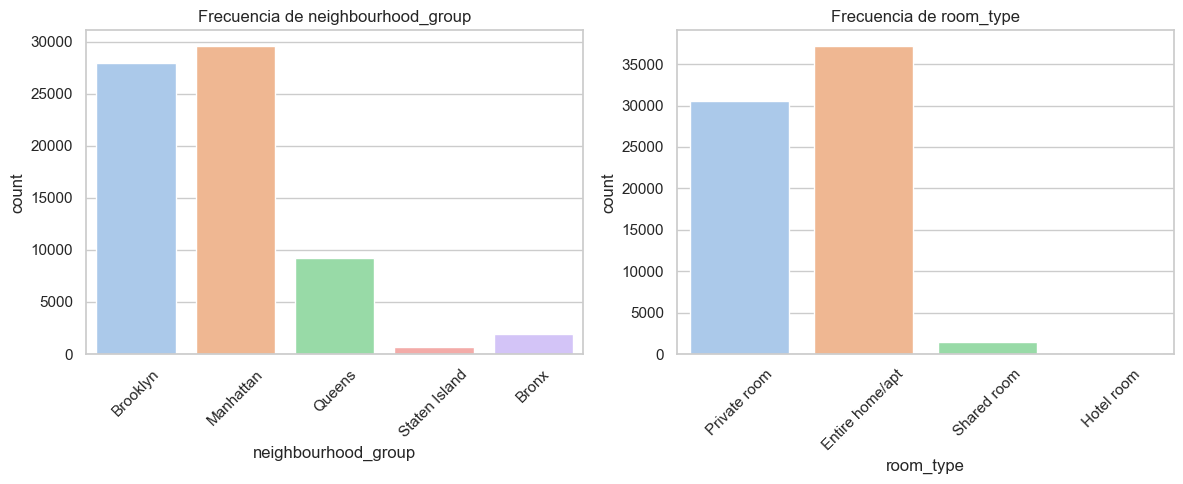

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Variables numéricas para Histogramas y Boxplots
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# 🔹 Histograma para variables numéricas
plt.figure(figsize=(12, 8))
df[numerical_columns].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

# 🔹 Boxplots para detectar outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# 🔹 Countplots para variables categóricas
categorical_columns = ['neighbourhood_group', 'room_type']

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f"Frecuencia de {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2️⃣ Análisis Bivariante (Scatterplots)
Analizamos relaciones entre dos variables.

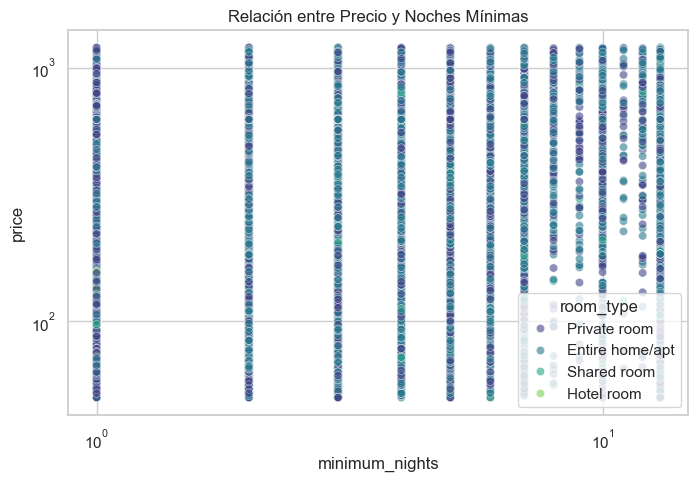

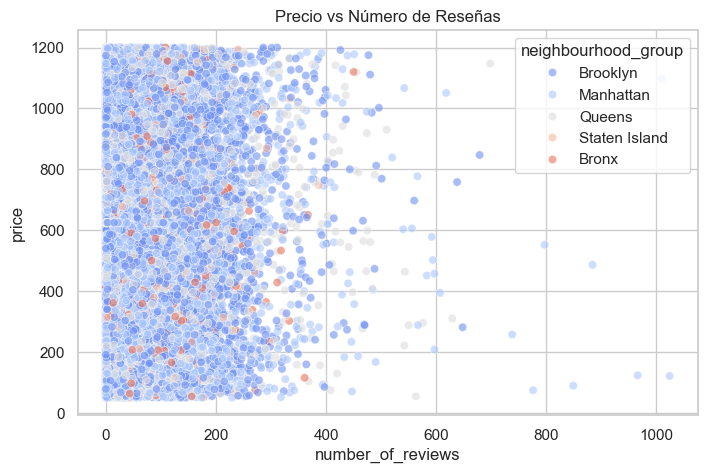

In [11]:
# 🔹 Scatterplot: Precio vs Mínimo de Noches
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='minimum_nights', y='price', hue='room_type', alpha=0.6, palette='viridis')
plt.title("Relación entre Precio y Noches Mínimas")
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.yscale("log")
plt.show()

# 🔹 Scatterplot: Precio vs Número de Reseñas
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group', alpha=0.6, palette='coolwarm')
plt.title("Precio vs Número de Reseñas")
plt.show()


 3️⃣ Análisis Multivariante (Heatmap, Pairplot)
Exploramos correlaciones y relaciones entre múltiples variables.

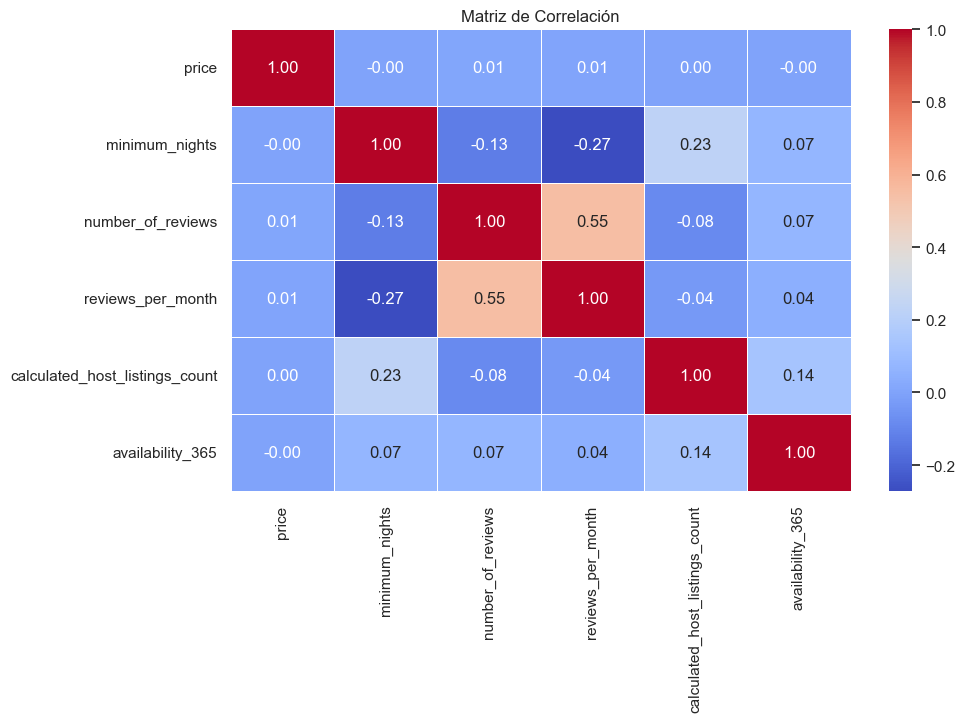

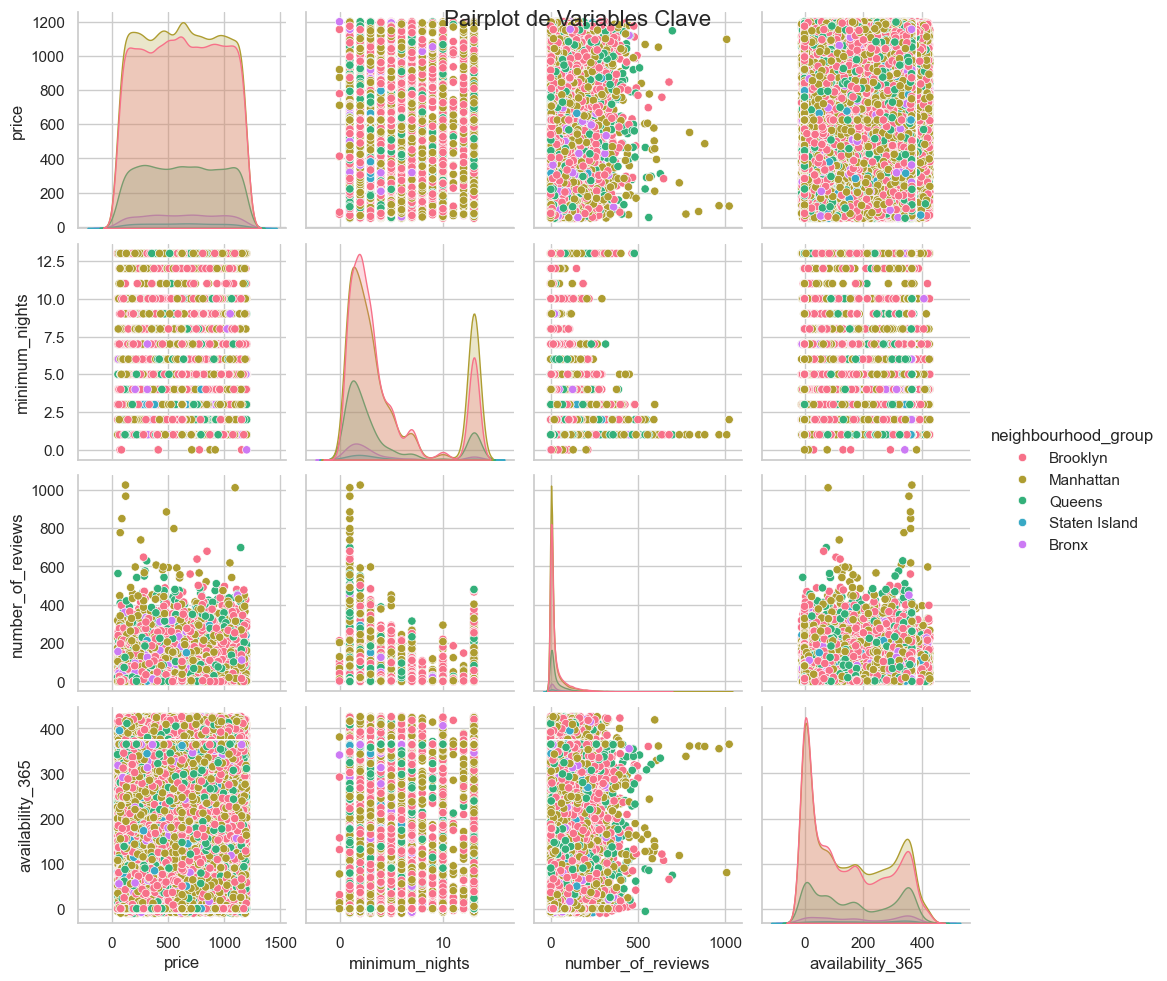

In [12]:
# 🔹 Matriz de Correlación (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# 🔹 Pairplot para visualizar relaciones entre variables clave
sns.pairplot(df, vars=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue="neighbourhood_group", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot de Variables Clave", fontsize=16)
plt.show()
